In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("D:\College\Semester 2\Statistika\machine.data")
print(data)

    Vendor Name     Model Name  MYCT  MMIN   MMAX  Cache  CHMIN  CHMAX  PRP  \
0        amdahl         470v/7    29  8000  32000     32      8     32  269   
1        amdahl        470v/7a    29  8000  32000     32      8     32  220   
2        amdahl        470v/7b    29  8000  32000     32      8     32  172   
3        amdahl        470v/7c    29  8000  16000     32      8     16  132   
4        amdahl         470v/b    26  8000  32000     64      8     32  318   
..          ...            ...   ...   ...    ...    ...    ...    ...  ...   
203      sperry           80/8   124  1000   8000      0      1      8   42   
204      sperry  90/80-model-3    98  1000   8000     32      2      8   46   
205      sratus             32   125  2000   8000      0      2     14   52   
206        wang         vs-100   480   512   8000     32      0      0   67   
207        wang          vs-90   480  1000   4000      0      0      0   45   

     ERP  
0    253  
1    253  
2    253  
3    13

In [2]:
data['ERP'].describe()

count     208.000000
mean       98.850962
std       154.974961
min        15.000000
25%        28.000000
50%        45.000000
75%        99.500000
max      1238.000000
Name: ERP, dtype: float64

In [3]:
data['Vendor Name'].value_counts()

ibm             32
nas             19
sperry          13
ncr             13
honeywell       13
siemens         12
amdahl           9
cdc              9
burroughs        8
hp               7
harris           7
dg               7
dec              6
ipl              6
magnuson         6
c.r.d            6
cambex           5
prime            5
formation        5
gould            3
nixdorf          3
perkin-elmer     3
basf             2
bti              2
wang             2
apollo           2
microdata        1
sratus           1
four-phase       1
Name: Vendor Name, dtype: int64

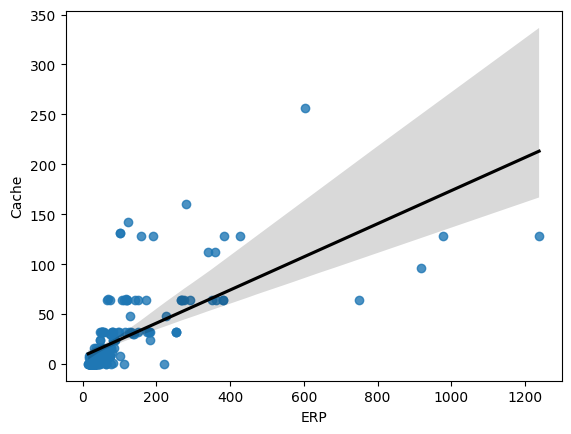

In [4]:
#Hubungan Cache dengan Relative Performance
sns.regplot(data=data, x='ERP', y='Cache', line_kws={"color": "black"})
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

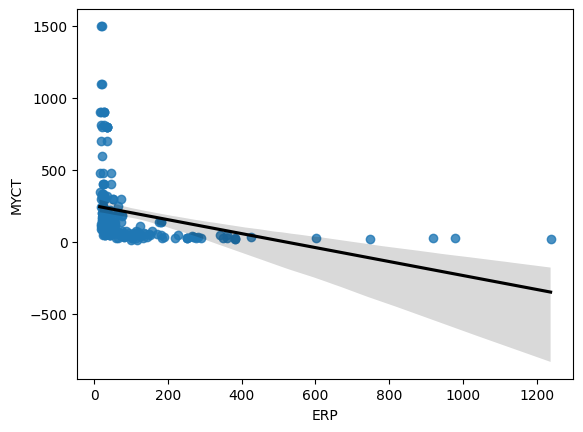

In [5]:
#Hubungan Cycle time dengan Relative Performance
sns.regplot(data=data, x='ERP', y='MYCT', line_kws={"color": "black"})
plt.show

In [6]:
data.corr()

C:\Users\Dhanu\AppData\Local\Temp\ipykernel_21088\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,MYCT,MMIN,MMAX,Cache,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.337071,-0.379592,-0.340414,-0.300734,-0.255629,-0.306571,-0.287806
MMIN,-0.337071,1.000000,0.757827,0.602788,0.526665,0.293877,0.798310,0.823113
MMAX,-0.379592,0.757827,1.000000,0.600680,0.568594,0.562388,0.865576,0.904180
Cache,-0.340414,0.602788,0.600680,1.000000,0.588128,0.423550,0.704642,0.687428
CHMIN,-0.300734,0.526665,0.568594,0.588128,1.000000,0.541762,0.608841,0.610094
CHMAX,-0.255629,0.293877,0.562388,0.423550,0.541762,1.000000,0.621309,0.606281
PRP,-0.306571,0.798310,0.865576,0.704642,0.608841,0.621309,1.000000,0.966423
ERP,-0.287806,0.823113,0.904180,0.687428,0.610094,0.606281,0.966423,1.000000


coef of determination training  0.9074830862648035
coef of determination testing  0.9117419490708634
coefficient
[0.06855791 0.01570592 0.00638702 0.55471666 0.29065168 0.9818916 ]
intercept
-70.88747378943413
prediction
[ 55.01741377 -18.1056416    9.54072179 286.81773375 204.07705302
  -6.34288799  -1.5822776   96.91200441 191.0546477   35.03122749]
real value
[ 47.  23.  25. 220. 142.  23.  35.  88. 124.  48.]
rmse :  45.07716948202629
r2 : 0.9117419490708634


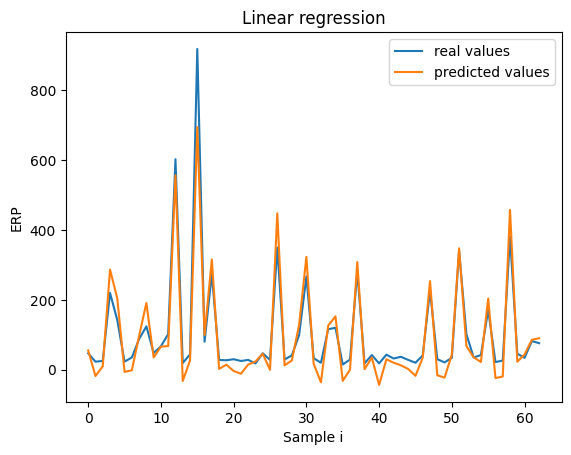

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Data yang dipake untuk memprediksi = [MMIN, MMAX, Cache, CHMIN, CHMAX]
df_X = data.drop(['Vendor Name', 'Model Name','PRP', 'ERP'], axis=1)
df_y = data['ERP']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

print('coef of determination training ', reg.score(X_train, y_train))
print('coef of determination testing ', reg.score(X_test, y_test))

print('coefficient')
print(reg.coef_)
print('intercept')
print(reg.intercept_)

print('prediction')
y_pred = reg.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('rmse : ', rmse)
print('r2 :', r2)

sns.lineplot(data=y_test[:100],label='real values')
sns.lineplot(data=y_pred[:100],label='predicted values')
plt.title("Linear regression")
plt.xlabel('Sample i') 
plt.ylabel('ERP') 
plt.show()

0.9121607573781924
['MYCT', 'MMIN', 'MMAX', 'Cache', 'CHMAX']
44.97009062478744
['MYCT', 'MMIN', 'MMAX', 'Cache', 'CHMAX']


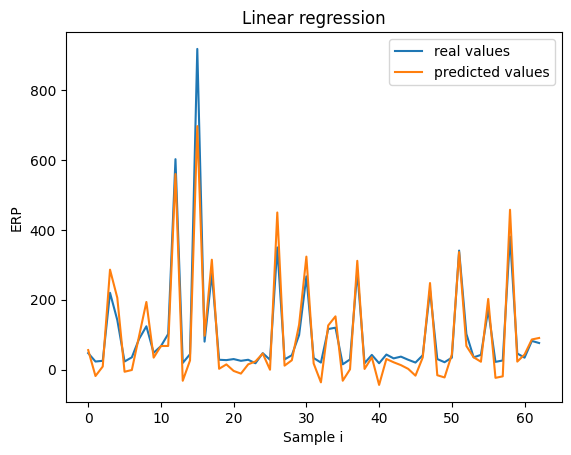

In [65]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


variables = ['MYCT' ,'MMIN', 'MMAX', 'Cache', 'CHMIN', 'CHMAX']
rmse_min = 0
r2_max = 0
rmse_Table = []
r2_Table = []
used_y_pred = []
used_y_test = []


for r in range(1, len(variables)):
    for combination in combinations(variables, r):
        combination = list(combination)
        data_X = (['Vendor Name', 'Model Name','PRP', 'ERP'])
        data_X = data.drop(np.concatenate((data_X, combination)), axis=1)
        data_Y = data['ERP']
        
        # for i in data_X.columns:
        #     print(i, end=" ")
        # print()

        X = data_X.astype(float).values
        y = data_Y.astype(float).values

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        reg = LinearRegression()
        reg.fit(X_train, y_train)

     
        y_pred = reg.predict(X_test)
        

        mse = mean_squared_error(y_test,y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test,y_pred)
        
        if r2_max < r2:
            r2_Table.clear()
            for i in data_X.columns:
                r2_Table.append(i)
            r2_max = r2
            used_y_pred = y_pred
            used_y_test = y_test
        
        if rmse_min > rmse or rmse_min == 0:
            rmse_Table.clear()
            for i in data_X.columns:
                rmse_Table.append(i)
            rmse_min = rmse

print(r2_max)
print(r2_Table)
print(rmse_min)
print(rmse_Table)


sns.lineplot(data=used_y_test[:100],label='real values')
sns.lineplot(data=used_y_pred[:100],label='predicted values')
plt.title("Linear regression")
plt.xlabel('Sample i') 
plt.ylabel('ERP') 
plt.show()
